In [76]:
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
from vocab import vocab
from vocab import get_wordnet_pos
#vocab = {'distance','temporary','romeo','fight','self','comedy', 'abide' ,'love', 'persustence' , 'hate', 'world', 'tragedy', 'fool', 'cry', 'hold', 'good', 'dream', 'joy', 'desire', 'sustain', 'arrogance', 'abuse', 'vile', 'asleep', 'warrior', 'perfect', 'death', 'lord', 'heart', 'juliet', 'cry', 'heaven', 'hell'}
print(len(vocab))

140


In [77]:
import seaborn as sb

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
'love' in vocab

True

In [80]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [81]:
nr = 11
nc = len(vocab)
df= pd.DataFrame(data= vocab)
df

,0
0,distance
1,separate
2,lord
3,hundred
4,gain
...,...
135,accuse
136,bush
137,woe
138,fall


In [82]:

# Curate data
matrix1 = []
matrix2 = []
matrix3 = []
# X = f.readline()
dtype = 'bool'
bag = list(vocab)
counter = 0
with open('love-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)
        
        line = line.lower()
        sent = re.sub('[\W_]+', ' ', line)
        wordsList = nltk.word_tokenize(sent)
        wordsList = [w for w in wordsList if not w in stop_words]
        tagged = nltk.pos_tag(wordsList)

        for word in tagged:
            try:
                tag = get_wordnet_pos(word[1])
                if tag != None:
                    final_word =  lemmatizer.lemmatize(word[0], pos = tag )
                    #print(final_word)
                    if final_word in vocab:
                        counter = counter+1
                        index = bag.index(final_word)
                        vec[index] = 1
                # print(vec)
            except:
                print("word not found: ", word[0], word[1])
        # print(np.count_nonzero(vec == 1))
        matrix1.append(vec)
    df2 = pd.DataFrame(data = matrix1)

with open('tragedy-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)

        line = line.lower()
        sent = re.sub('[\W_]+', ' ', line)
        wordsList = nltk.word_tokenize(sent)
        wordsList = [w for w in wordsList if not w in stop_words]
        tagged = nltk.pos_tag(wordsList)

        for word in tagged:
            try:
                tag = get_wordnet_pos(word[1])
                if tag != None:
                    final_word =  lemmatizer.lemmatize(word[0], pos = tag ) 
                    #print(final_word)   
                    if final_word in vocab:
                        counter = counter+1
                        index = bag.index(final_word)
                        vec[index] = 1
                # print(vec)
            except:
                print("word not found: ", word[0], word[1])
        # print(np.count_nonzero(vec == 1))
        matrix2.append(vec)
    df3 = pd.DataFrame(data = matrix2)
    # df2.join(pd.DataFrame(data = matrix2))


with open('comedy-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)

        line = line.lower()
        sent = re.sub('[\W_]+', ' ', line)
        wordsList = nltk.word_tokenize(sent)
        wordsList = [w for w in wordsList if not w in stop_words]
        tagged = nltk.pos_tag(wordsList)

        for word in tagged:
            try:
                tag = get_wordnet_pos(word[1])
                if tag != None:
                    final_word =  lemmatizer.lemmatize(word[0], pos = tag )  
                    #print(final_word)  
                    if final_word in vocab:
                        counter = counter+1
                        index = bag.index(final_word)
                        vec[index] = 1
                # print(vec)
            except:
                print("word not found: ", word[0], word[1])
        # print(np.count_nonzero(vec == 1))
        matrix3.append(vec)
    df4 = pd.DataFrame(data = matrix3)


dummy
1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40    41     42    43     44     45     46     47     48     49     50     51    52     53     54     55    56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83    84     85     86     87     88     89     90     91     92     93    94     95    96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118   119    120    121    122    123    124    125    126   127    128    129    130    131    132   133    134    135    136    137    138    139  
False  False  False  False  False

<AxesSubplot:>

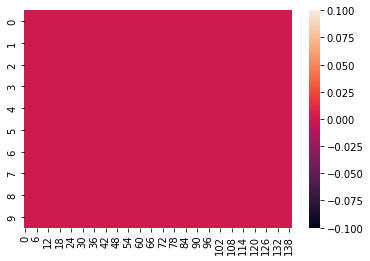

In [83]:
# print(counter)
print("dummy")
print(df2.value_counts()[1])
sb.heatmap(df2.isna())

In [84]:

X_train1 = df2.to_numpy(dtype=dtype)
y_train1 = np.zeros(10, dtype=dtype)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1,y_train1,test_size=0.4,random_state=0)

X_train2 = df3.to_numpy(dtype=dtype)
y_train2 = np.ones(10, dtype=dtype)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2,y_train2,test_size=0.4,random_state=0)

X_train3 = df4.to_numpy(dtype=dtype)
y_train3 = np.full((10),2, dtype=dtype)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3,y_train3,test_size=0.4,random_state=0)

In [85]:

x_train_new = np.concatenate((X_train1,X_train2,X_train3),axis = 0)
y_train_new = np.concatenate((y_train1,y_train2,y_train3))

x_test_new = np.concatenate((X_test1,X_test2,X_test3),axis = 0)
y_test_new = np.concatenate((y_test1,y_test2,y_test3))


In [86]:
# K nearest Neighbours 
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train_new,y_train_new)
knn_score = knn_clf.score(x_test_new,y_test_new)
print("K nearest neighbour accuracy: ", knn_score)

K nearest neighbour accuracy:  0.5833333333333334


In [87]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train_new, y_train_new)
lr_score = lr_clf.score(x_test_new,y_test_new)
print("Logistic Regression accuracy: ", lr_score)

Logistic Regression accuracy:  0.8333333333333334


In [88]:
from sklearn.tree import DecisionTreeClassifier as decision_tree
clf = decision_tree(random_state=0)
clf.fit(x_train_new,y_train_new)
dt_score = clf.score(x_test_new, y_test_new)
print("Decision Tree accuracy: ", dt_score)

Decision Tree accuracy:  0.8333333333333334


In [89]:
# Support vector machine
from sklearn.svm import SVC
sv_clf = SVC(probability=True,kernel='linear')
sv_clf.fit(x_train_new,y_train_new)
svm_score = sv_clf.score(x_test_new, y_test_new)
print("Support Vector machine accuracy: ",svm_score)

Support Vector machine accuracy:  0.8333333333333334


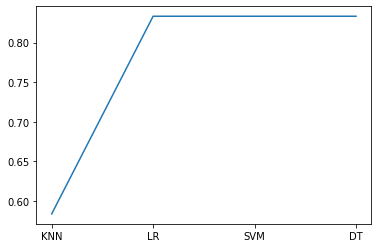

In [90]:
res = [knn_score, lr_score, svm_score, dt_score]
plt.plot(["KNN", "LR", "SVM", "DT"], res )